<a href="https://colab.research.google.com/github/alfianAH/ml-resource/blob/main/23_Images_and_Video_video_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2020 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Video Processing

In this lesson we will process video data using the [OpenCV](https://opencv.org/) Python library.

## Obtain a Video

Let's start by uploading the smallest version of [this video](https://pixabay.com/videos/cars-motorway-speed-motion-traffic-1900/) to the Colab. Rename the video to `cars.mp4` or change the name of the video in the code below.

## Reading the Video

OpenCV is an open source library for performing computer vision tasks. One of these tasks is reading and writing video frames. To read the `cars.mp4` video file, we use the [VideoCapture](https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#videocapture) class.

In [6]:
import cv2 as cv

cars_video = cv.VideoCapture('cars.mp4')

Once you have created a `VideoCapture` object, you can obtain information about the video that you are processing.

In [7]:
height = int(cars_video.get(cv.CAP_PROP_FRAME_HEIGHT))
width = int(cars_video.get(cv.CAP_PROP_FRAME_WIDTH))
fps = cars_video.get(cv.CAP_PROP_FPS)
total_frames = int(cars_video.get(cv.CAP_PROP_FRAME_COUNT))

print(f'height: {height}')
print(f'width: {width}')
print(f'frames per second: {fps}')
print(f'total frames: {total_frames}')
print(f'video length (seconds): {total_frames / fps}')

height: 540
width: 960
frames per second: 30.058027079303674
total frames: 518
video length (seconds): 17.233333333333334


When you are done processing a video file, it is a good idea to release the VideoCapture to free up memory in your program.

In [8]:
cars_video.release()

We can now loop through the video frame by frame. To do this we need to know the total number of frames in the video. For each frame we set the current frame position and then read that frame. This causes the frame to be loaded from disk into memory. This is done because videos can be enormous in size, so we don't necessarily want the entire thing in memory.
 
You might also notice that we read the frame from the car's video, and then we check the return value to make sure that the read was successful. This is because the underlying video processing library is written in the C++ programming language, and a common practice in that language is to return a status code indicating if a function succeeds or not. This isn't very idiomatic in Python; it is just the underlying library's style leaking through into the Python wrapper.

In [9]:
cars_video = cv.VideoCapture('cars.mp4')

total_frames = int(cars_video.get(cv.CAP_PROP_FRAME_COUNT))

frames_read = 0

for current_frame in range(0, total_frames):
  cars_video.set(cv.CAP_PROP_POS_FRAMES, current_frame)
  ret, _ = cars_video.read()
  if not ret:
    raise Exception(f'Problem reading frame {current_frame} from video')
  if (current_frame+1) % 50 == 0:
    print(f'Read {current_frame+1} frames so far')

cars_video.release()

print(f'Read {total_frames} frames')

Read 50 frames so far
Read 100 frames so far
Read 150 frames so far
Read 200 frames so far
Read 250 frames so far
Read 300 frames so far
Read 350 frames so far
Read 400 frames so far
Read 450 frames so far
Read 500 frames so far
Read 518 frames


That code took a while to execute. The video is just over a minute long, and it takes a while to iterate over every frame. Consider the amount of time it would take to perform object recognition on each frame.

In practice you will be doing this kind of processing on a much bigger machine, or machines, than Colab provides for free. You can also process many frames in parallel.

For our purposes, let's just make the video shorter.

We'll load the video one more time, and then we'll read out a single frame to illustrate that the frame is just an image.

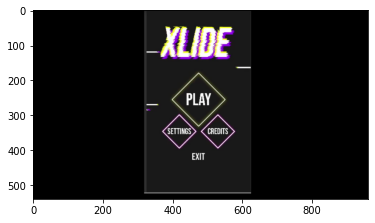

In [10]:
import matplotlib.pyplot as plt

cars_video = cv.VideoCapture('cars.mp4')
cars_video.set(cv.CAP_PROP_POS_FRAMES, 123)
ret, frame = cars_video.read()
if not ret:
  raise Exception(f'Problem reading frame {current_frame} from video')

cars_video.release()

plt.imshow(frame)

## Writing a Video

OpenCV also supports writing video data. Let's loop through the long video that we have and save only one second of it into a new file.

First we need to open our input video and get information about the frame rate, height, and width.

In [25]:
input_video = cv.VideoCapture('cars.mp4')

height = int(input_video.get(cv.CAP_PROP_FRAME_HEIGHT))
width = int(input_video.get(cv.CAP_PROP_FRAME_WIDTH))
fps = input_video.get(cv.CAP_PROP_FPS)

print(f'height: {height}')
print(f'width: {width}')
print(f'frames per second: {fps}')

height: 540
width: 960
frames per second: 30.058027079303674


Using that information we can create a [VideoWriter](https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#videowriter) that we'll use to write the shorter video.

Video can be encoded using many different formats. In order to tell OpenCV which format to use, we choose a "four character code" from [fourcc](https://www.fourcc.org/). In this case we use "mp4v" to keep our input and output files consistent.

In [26]:
fourcc = cv.VideoWriter_fourcc(*'mp4v')
output_video = cv.VideoWriter('cars-short.mp4', fourcc, fps, (width, height))

Now we can loop through one second of video frames and write each frame to our output video.

In [27]:
for i in range(0, int(fps)):
  input_video.set(cv.CAP_PROP_POS_FRAMES, i)
  ret, frame = input_video.read()
  if not ret:
    raise Exception("Problem reading frame", i, " from video")
  output_video.write(frame)

Once processing is complete, be sure to release the video objects from memory.

In [33]:
input_video.release()
output_video.release()

And now we can list the directory to see if our new file was created.

In [34]:
import os

os.listdir('./')

['.config', 'cars-sampled.mp4', 'cars.mp4', 'cars-short.mp4', 'sample_data']

You should now see a `cars-short.mp4` file in your file browser in Colab. Download and view the video to make sure that it only lasts for a second.

Notice we have only concerned ourselves with the visual portion of the video. Videos contain both visual and auditory elements. OpenCV is only concerned with computer vision, so it doesn't handle audio processing.

# Exercises

## Exercise 1

Above we shortened our video to 1 second by simply grabbing the first second of frames from the video file. Since not much typically changes from frame to frame within a second of video, a better video processing technique is to sample frames throughout the entire video and skip some frames. For example, it might be more beneficial to process every 10th frame or only process 1 of the frames in every second of video.

In this exercise, take the original cars video used in this Colab and reduce it to a short 25-fps (frames per second) video by grabbing the first frame of every second of video. Save the video as `cars-sampled.mp4`.

### **Student Solution**

In [60]:
# Your code goes here
input_video = cv.VideoCapture('cars.mp4')

height = int(input_video.get(cv.CAP_PROP_FRAME_HEIGHT))
width = int(input_video.get(cv.CAP_PROP_FRAME_WIDTH))
fps = input_video.get(cv.CAP_PROP_FPS)
total_frames = input_video.get(cv.CAP_PROP_FRAME_COUNT)

print("Input")
print("height: {}".format(height))
print("width: {}".format(width))
print("fps: {}".format(fps))
print("total_frame: {}".format(total_frames))
print('video length (seconds): {}'.format(total_frames / fps))

fourcc = cv.VideoWriter_fourcc(*'mp4v')
output_video = cv.VideoWriter('cars-sampled.mp4', fourcc, 25, (width, height))

for curr_frame in range(0, int(total_frames)):
    input_video.set(cv.CAP_PROP_POS_FRAMES, curr_frame)
    ret, frame = input_video.read()
    
    if not ret:
        raise Exception("Problem reading frame", i, " from video")

    output_video.write(frame)

input_video.release()
output_video.release()

output_video = cv.VideoCapture('cars-sampled.mp4')
height = int(output_video.get(cv.CAP_PROP_FRAME_HEIGHT))
width = int(output_video.get(cv.CAP_PROP_FRAME_WIDTH))
fps = output_video.get(cv.CAP_PROP_FPS)
total_frames = output_video.get(cv.CAP_PROP_FRAME_COUNT)

print("\nOutput")
print("height: {}".format(height))
print("width: {}".format(width))
print("fps: {}".format(fps))
print("total_frame: {}".format(total_frames))
print('video length (seconds): {}'.format(total_frames / fps))

output_video.release()

Input
height: 540
width: 960
fps: 30.058027079303674
total_frame: 518.0
video length (seconds): 17.233333333333334

Output
height: 540
width: 960
fps: 25.0
total_frame: 518.0
video length (seconds): 20.72


---